In [7]:
import pandas as pd
import os
from pgtools.maf_parser import parse_maf, MAF
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
maf_dir = "/home/pampuch/studia/magisterka/test_data/klebsiella_subset_old/panaroo_new.maf"

In [7]:
maf = parse_maf(maf_dir)

In [8]:
small_maf = MAF(list(maf.seq_collections)[:300])

In [9]:
df_lens = pd.read_csv("/home/pampuch/studia/magisterka/test_data/klebsiella_subset_old/new_lens.csv")

In [10]:
df_lens

,block mean seq len,blocks count
0,1489,9
1,349,23
2,889,18
3,888,1
4,424,15
...,...,...
1752,1882,1
1753,512,1
1754,3013,1
1755,2503,1


In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [28]:
block_lens = []
for row in df_lens.iterrows():
    block_lens += [row[1]["block mean seq len"] * row[1]["blocks count"]]
block_lens = np.array(block_lens)

In [42]:
block_lens_all = [block_lens*i for i in range(1,4)]

In [61]:
def prep_hist_data(csv_file):
    df = pd.read_csv(csv_file)
    col_1, col_2 = list(df.columns)
    block_lens = []
    for row in df.iterrows():
        block_lens += [row[1][col_1]] * row[1][col_2]
    block_lens = np.array(block_lens)
    return block_lens

In [62]:
prep_hist_data("/home/pampuch/studia/magisterka/test_data/klebsiella_subset_old/new_lens.csv")

array([1489, 1489, 1489, ..., 3013, 2503,  695])

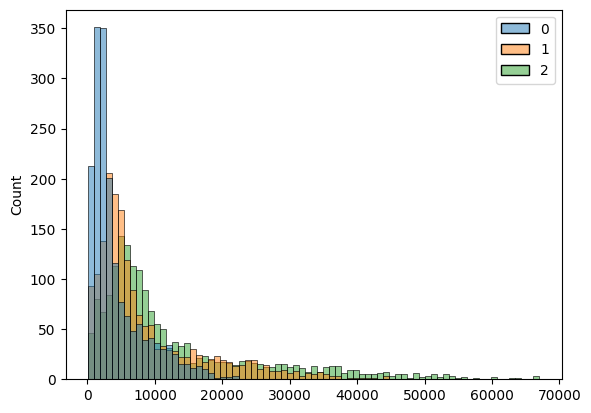

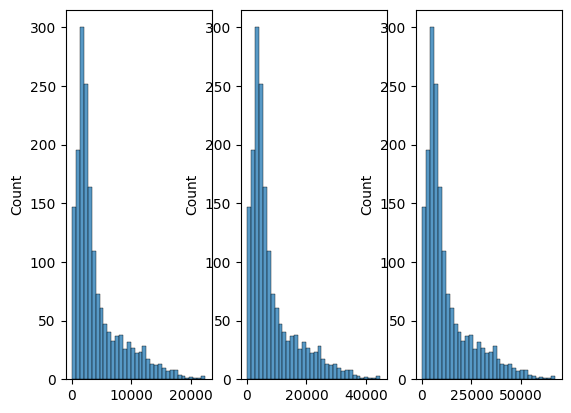

In [44]:
sns.histplot(block_lens_all)



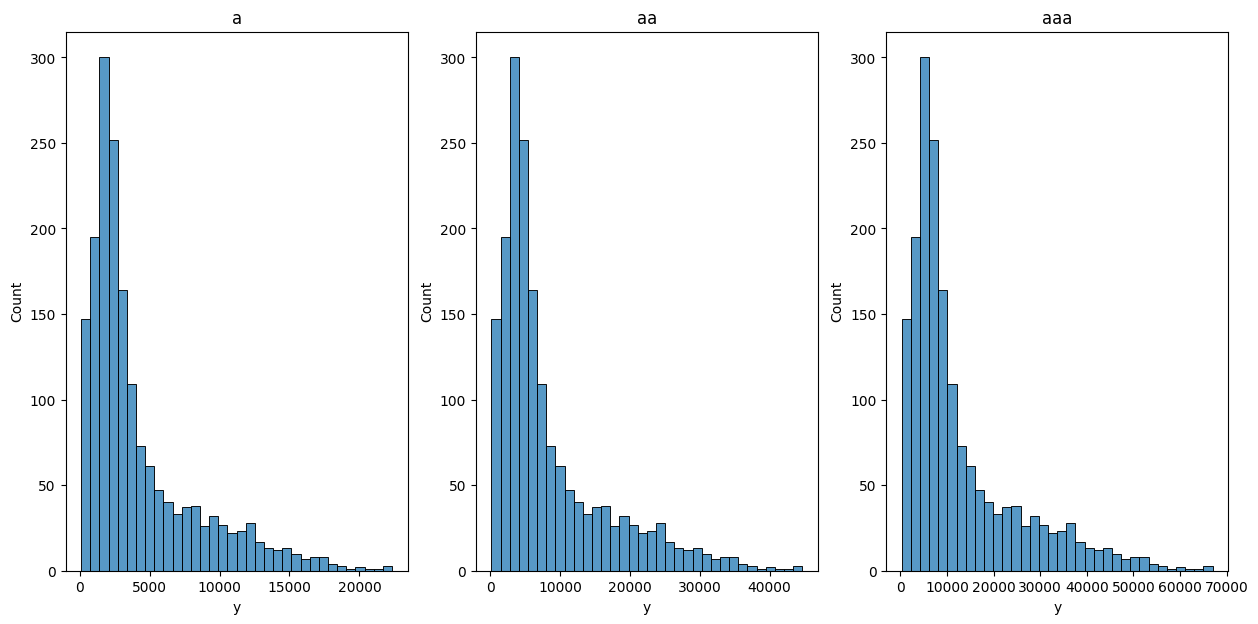

In [61]:
fig, axes = plt.subplots(1,3,figsize=(15, 7))
# fig.s
for i in range(3):
    sns.histplot(block_lens_all[i], ax=axes[i])
    axes[i].set_title("a"*(i+1))
    axes[i].set_xlabel("y")
plt.show()

In [17]:
boxplots_dir = "/home/pampuch/studia/magisterka/final_summaries/boxplots/blocks_hists_csv/"

In [20]:
for f in os.listdir(boxplots_dir):
    print(f)
    for i in os.listdir(os.path.join(boxplots_dir, f)):
        print(i)

panaroo
GPSC_sizes.csv
GPSC_lens.csv
klebsiella_lens.csv
ecoli_sizes.csv
ecoli_lens.csv
klebsiella_sizes.csv
pggb
klebsiella_pggb_sizes.csv
GPSC_pggb_lens.csv
GPSC_pggb_sizes.csv
ecoli_pggb_lens.csv
ecoli_pggb_sizes.csv
klebsiella_pggb_lens.csv
cactus
GPSC_cactus_lens.csv
klebsiella_cactus_lens.csv
GPSC_lens.csv
klebsiella_lens.csv
GPSC_pggb_lens.csv
ecoli_sizes.csv
GPSC_cactus_sizes.csv
ecoli_lens.csv
ecoli_pggb_lens.csv
klebsiella_cactus_sizes.csv
klebsiella_pggb_lens.csv


In [21]:
# chcemy mieć po 3 (po 2) dla każdego datasetu

In [1]:
csv = "~/studia/magisterka/final_summaries/boxplots/blocks_hists_csv/cactus/ecoli_lens.csv"

In [14]:
def prep_hist_data(csv_file):
    df = pd.read_csv(csv_file)
    # col_1, col_2 = list(df.columns)
    # block_lens = []
    # for row in df.iterrows():
    #     block_lens += [row[1][col_1]] * row[1][col_2]
    # block_lens = np.array(block_lens)
    res = [[],[]]
    for col in df.columns:
        if col.endswith("count"):
           res[1] = df[col].to_numpy()
        else:
            res[0] = df[col].to_numpy()
    return res

In [15]:
prep_hist_data(csv)

[array([  19,  600,    2, ..., 6099, 1361, 4382]),
 array([4, 1, 8, ..., 1, 1, 1])]

In [11]:
prep_hist_data("~/studia/magisterka/final_summaries/boxplots/blocks_hists_csv/cactus/ecoli_sizes.csv")

array([101, 101, 101, ...,  25, 103, 104])

In [12]:
df = pd.read_csv("~/studia/magisterka/final_summaries/boxplots/blocks_hists_csv/cactus/ecoli_sizes.csv")

In [13]:
df

,block size,blocks count
0,101,1048
1,2,66
2,99,80
3,70,3
4,97,11
5,94,12
6,4,1
7,100,17
8,102,13
9,87,14


In [18]:
hist_data = {}
for f in os.listdir(boxplots_dir):
    print(f)
    for i in os.listdir(os.path.join(boxplots_dir, f)):
        dataset = i.split("_")[0]
        print(dataset)
        if not dataset in hist_data:
            hist_data[dataset] = {}
        if not f in hist_data[dataset]:
            hist_data[dataset][f] = {}
        hist_data[dataset][f][i.split("_")[-1].split(".")[0]] = prep_hist_data(os.path.join(boxplots_dir,f,i))

panaroo
GPSC
GPSC
klebsiella
ecoli
ecoli
klebsiella
pggb
klebsiella
GPSC
GPSC
ecoli
ecoli
klebsiella
cactus
GPSC
klebsiella
ecoli
GPSC
ecoli
klebsiella


In [19]:
for dataset, models in hist_data.items():
    print(models)

{'panaroo': {'sizes': [array([20, 17, 16,  7, 19, 15, 14,  4,  6,  2,  8, 11, 22,  3, 13, 12, 27,
       18, 10, 31, 21,  9, 25,  5, 32, 29, 37, 35, 23, 24, 38, 26, 28, 33,
       30, 39, 34, 36]), array([1500,   28,   54,   84,   72,   60,   26,  188,  117,  270,  124,
         56,   22,  143,   50,   63,    7,   38,   53,    2,   47,   49,
          9,   40,    4,    1,    2,    2,   10,    8,    3,    2,    3,
          2,    5,    1,    3,    1])], 'lens': [array([4319,  898,  562, ...,  488, 1663,  417]), array([1, 9, 6, ..., 1, 1, 1])]}, 'pggb': {'lens': [array([   20,     3,     2,     4,    12,   160,   237,    15,     6,
          25,    29,   134,    99,    21,     5,   138,     9,    87,
          30,    23,    37,     7,    13,   108,    22,    33,    69,
          26,     8,   100,   120,    38,   128,    11,   142,   435,
          61,   114,    57,    62,    60,    31,   168,    46,    24,
          16,   104,   165,    84,   225,    14,    18,    83,   238,
          81

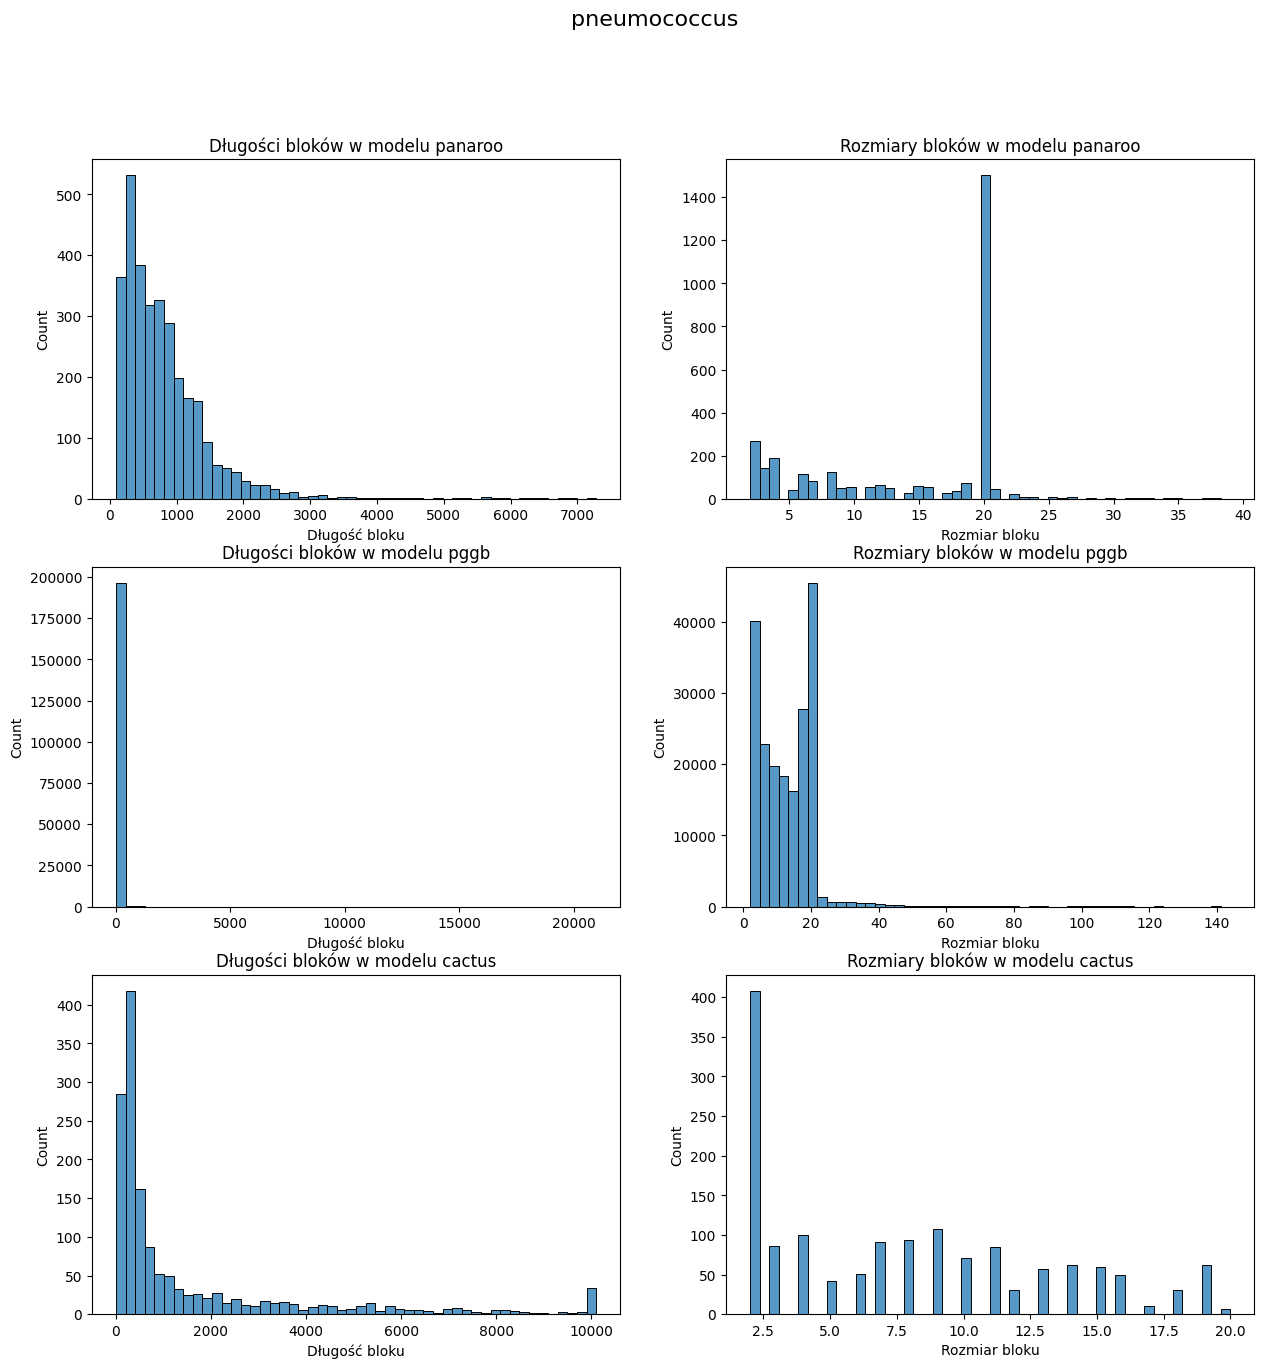

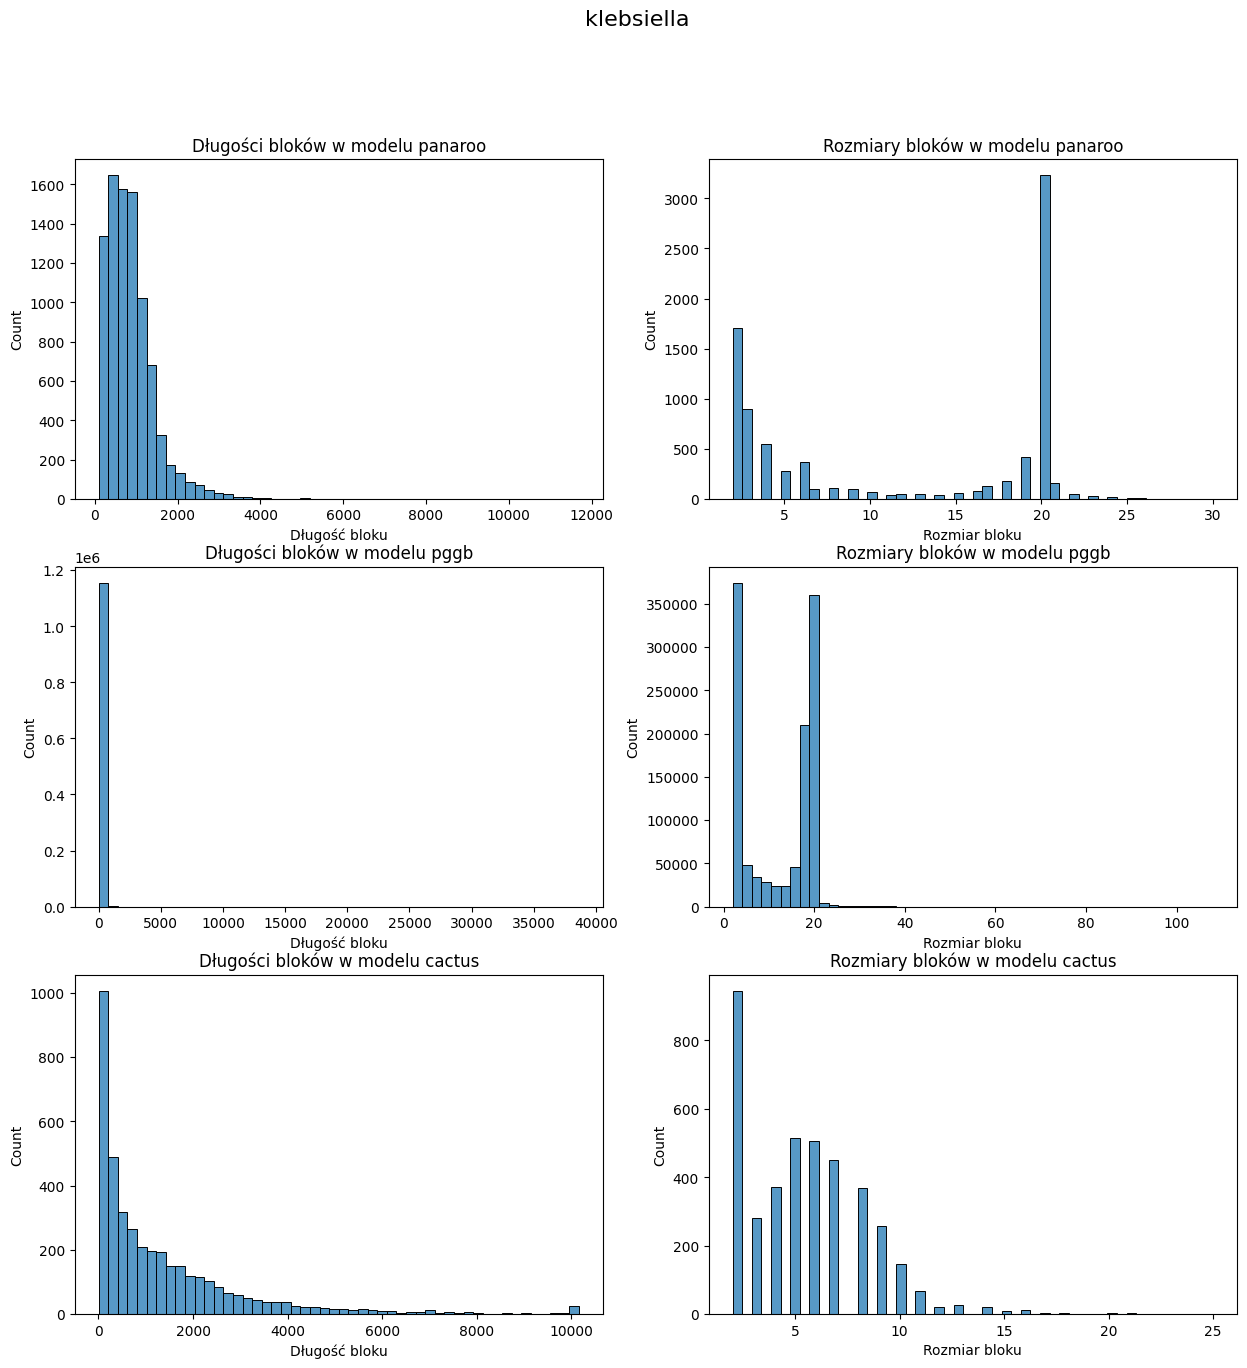

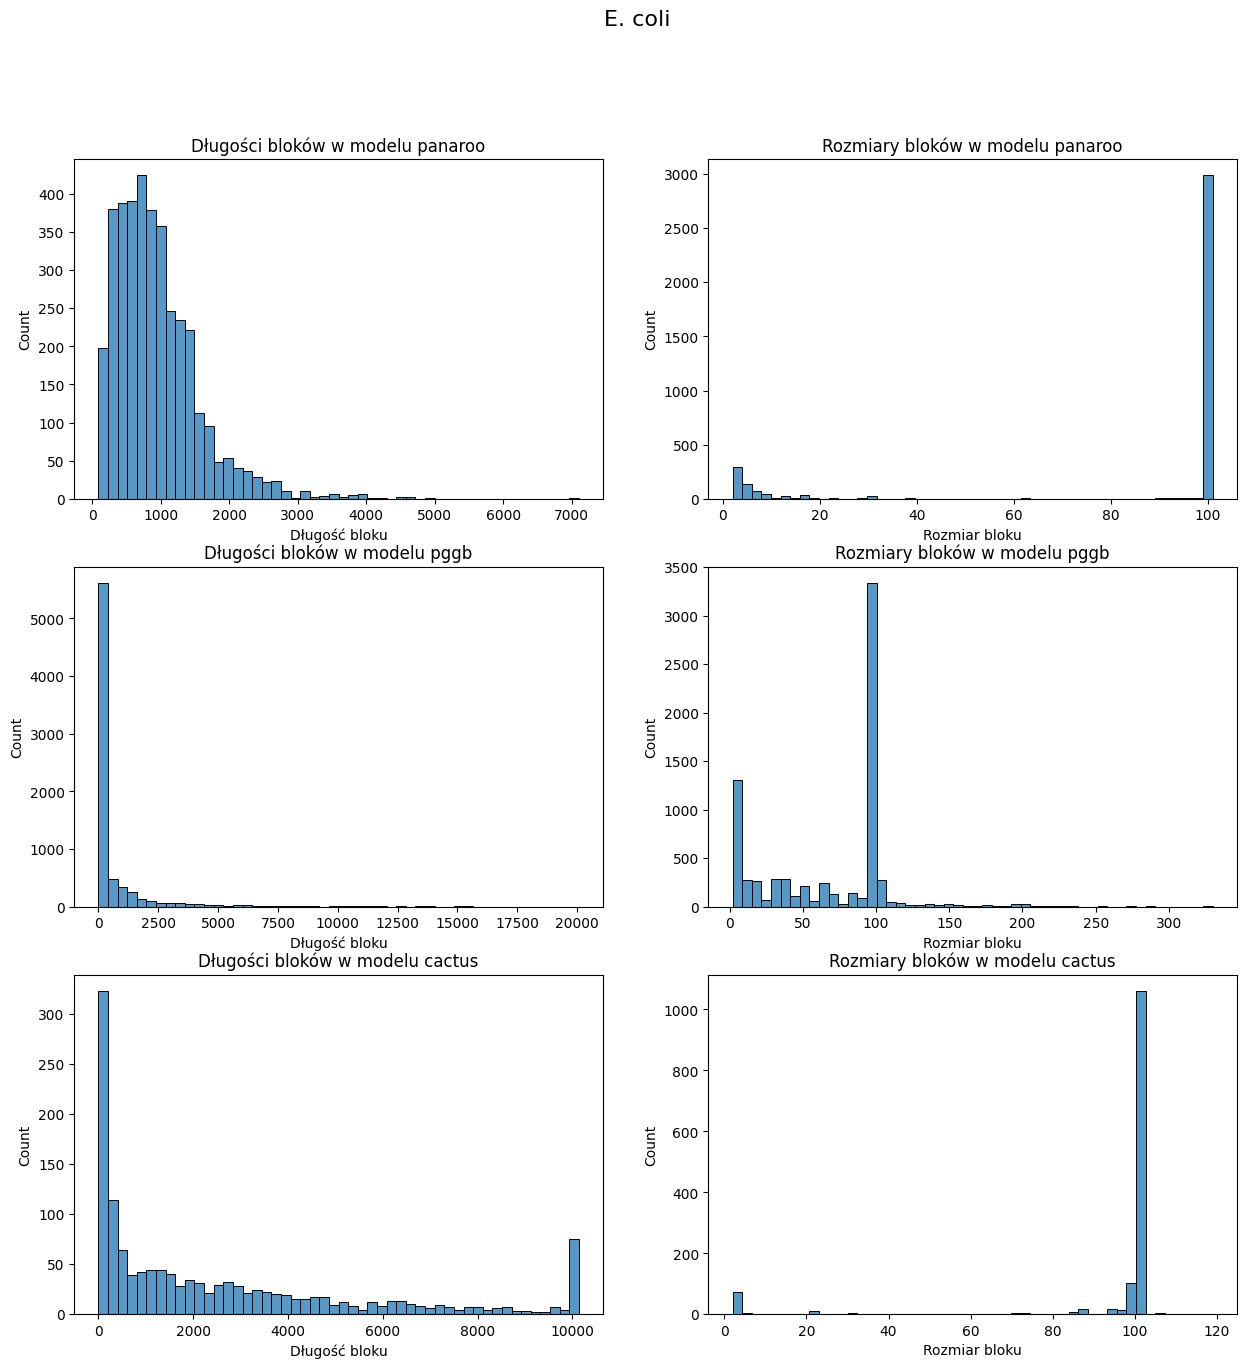

In [26]:
title_map = {"GPSC": "pneumococcus", "klebsiella":"klebsiella", "ecoli": "E. coli"}
for dataset, models in hist_data.items():
    fig, axes = plt.subplots(3,2,figsize=(15, 15))
    # fig.s
    c = 0
    r = 0
    for model, par in models.items():
        # print(model, par)
        sns.histplot(x=par["lens"][0], weights=par["lens"][1], ax=axes[c,0], bins=50)
        axes[c,0].set_title(f"Długości bloków w modelu {model}")
        axes[c,0].set_xlabel("Długość bloku")
        sns.histplot(x=par["sizes"][0], weights=par["sizes"][1], ax=axes[c,1], bins=50)
        axes[c,1].set_title(f"Rozmiary bloków w modelu {model}")
        axes[c,1].set_xlabel("Rozmiar bloku")
        fig.suptitle(title_map[dataset], fontsize=16)
        c += 1
    plt.savefig(f"{dataset}.svg")